<a href="https://colab.research.google.com/github/GadagiAmogh/Kaggle_Notebooks/blob/main/Transfer%2BLearning%2BCallbacks%2BTensorboard%2BFood_Vision_10_Percent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Apr 12 05:24:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
# Download and becoming one with the data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-04-12 05:31:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  35.7MB/s    in 4.5s    

2022-04-12 05:31:40 (35.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [7]:
#Unzip
import zipfile
zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()

In [10]:
# How many image in each folder folder.
# Walk through the data and list number of files
import os
for dirpath, dirnames, filenames in os.walk('10_food_classes_10_percent'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in 10_food_classes_10_percent.
There are 10 directories and 0 images in 10_food_classes_10_percent/test.
There are 0 directories and 250 images in 10_food_classes_10_percent/test/hamburger.
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ice_cream.
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ramen.
There are 0 directories and 250 images in 10_food_classes_10_percent/test/grilled_salmon.
There are 0 directories and 250 images in 10_food_classes_10_percent/test/pizza.
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_wings.
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_curry.
There are 0 directories and 250 images in 10_food_classes_10_percent/test/steak.
There are 0 directories and 250 images in 10_food_classes_10_percent/test/fried_rice.
There are 0 directories and 250 images in 10_food_classes_10_percent/test/sushi.
There are 

In [13]:
# setup data imput
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (224, 224)
BATCH_SIZE =32
EPOCHS = 15

train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

train_data_gen = ImageDataGenerator(rescale =1/255.)
test_data_gen = ImageDataGenerator(rescale =1/255.)

train_data_10_percent = train_data_gen.flow_from_directory(train_dir, 
                                                           target_size = IMAGE_SIZE,
                                                           batch_size= BATCH_SIZE,
                                                           class_mode = 'categorical')


test_data_10_percent = test_data_gen.flow_from_directory(test_dir,
                                                         target_size = IMAGE_SIZE,
                                                         batch_size= BATCH_SIZE,
                                                         class_mode = 'categorical')


Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Setting up callbacks

-Utilites called at certain time during training

In [34]:
# Create tensorboard callback
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name+ '/' + experiment_name + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f'Saving tensorboard log files to : {log_dir}')
  return tensorboard_callback

# Creating models using Tensorflow Hub

In [16]:
! pip install tensorflow_hub

In [23]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import layers

In [22]:
## Browing the tensorflow hub page and browsing through different models we import the efficient net model

In [20]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [26]:
from keras.layers.core.activation import Activation
# lets creat a 
def create_model(model_url, num_classes=10):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name='Feature_extraction_layer',
                                           input_shape = IMAGE_SIZE +(3,))
  
  #create our model

  model = tf.keras.Sequential([
                               feature_extractor_layer,
                               layers.Dense(num_classes, activation = 'softmax', name='output_layer')
  ])
  
  return model

#Creating and Testing RESNET model from tensorflow hub

In [27]:
resnet_model = create_model(resnet_url,
                            num_classes = train_data_10_percent.num_classes)

In [28]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [29]:
resnet_model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
hist1= resnet_model.fit(train_data_10_percent, epochs =5, steps_per_epoch=len(train_data_10_percent),
                        validation_data= test_data_10_percent, validation_steps= len(test_data_10_percent),
                        callbacks =[create_tensorboard_callback(dir_name= 'tensorflow_hub', experiment_name='resnet50v2')])

Saving tensorboard log files to : tensorflow_hub/resnet50v220220412-063228
Epoch 1/5
24/24 [==============================] - 31s 751ms/step - loss: 1.7322 - accuracy: 0.4280 - val_loss: 1.1482 - val_accuracy: 0.6124
Epoch 2/5
24/24 [==============================] - 16s 673ms/step - loss: 0.8536 - accuracy: 0.7373 - val_loss: 0.8338 - val_accuracy: 0.7324
Epoch 3/5
24/24 [==============================] - 16s 676ms/step - loss: 0.6039 - accuracy: 0.8373 - val_loss: 0.7361 - val_accuracy: 0.7632
Epoch 4/5
24/24 [==============================] - 16s 675ms/step - loss: 0.4654 - accuracy: 0.8800 - val_loss: 0.7088 - val_accuracy: 0.7660
Epoch 5/5
24/24 [==============================] - 16s 673ms/step - loss: 0.3713 - accuracy: 0.9107 - val_loss: 0.6679 - val_accuracy: 0.7856


In [36]:
#plot validation and training curve seperately
import matplotlib.pyplot as plt
def plot_loss_curve(history):
  """
  Returns seperate loss curves for the metrics
  """
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #plot losses
  plt.plot(epochs, train_loss, label= 'Training loss')
  plt.plot(epochs, val_loss, label='Validation loss')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label= 'Training accuracy')
  plt.plot(epochs, val_accuracy, label='Validation accuracy')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')


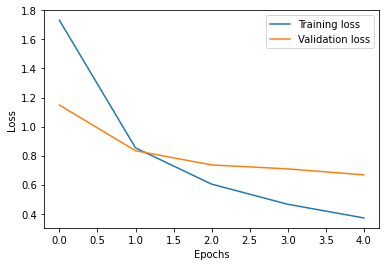

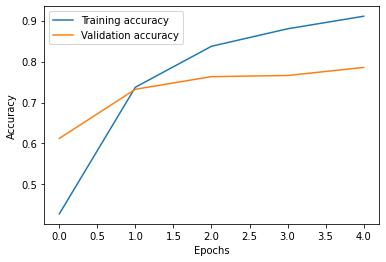

In [37]:
plot_loss_curve(hist1)

#Creating and Testing Efficient Net model from tensorflow hub

In [38]:
efficientnet_model = create_model(efficientnet_url,
                            num_classes = train_data_10_percent.num_classes)

In [40]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [41]:
efficientnet_model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
hist2= efficientnet_model.fit(train_data_10_percent, epochs =5, steps_per_epoch=len(train_data_10_percent),
                        validation_data= test_data_10_percent, validation_steps= len(test_data_10_percent),
                        callbacks =[create_tensorboard_callback(dir_name= 'tensorflow_hub', experiment_name='EfficientNetB0')])

Saving tensorboard log files to : tensorflow_hub/EfficientNetB020220412-065139
Epoch 1/5
24/24 [==============================] - 26s 733ms/step - loss: 1.7396 - accuracy: 0.5053 - val_loss: 1.2243 - val_accuracy: 0.7656
Epoch 2/5
24/24 [==============================] - 16s 669ms/step - loss: 1.0108 - accuracy: 0.7827 - val_loss: 0.8279 - val_accuracy: 0.8316
Epoch 3/5
24/24 [==============================] - 15s 663ms/step - loss: 0.7304 - accuracy: 0.8320 - val_loss: 0.6745 - val_accuracy: 0.8520
Epoch 4/5
24/24 [==============================] - 15s 659ms/step - loss: 0.5947 - accuracy: 0.8640 - val_loss: 0.5992 - val_accuracy: 0.8568
Epoch 5/5
24/24 [==============================] - 15s 663ms/step - loss: 0.5036 - accuracy: 0.8787 - val_loss: 0.5429 - val_accuracy: 0.8672


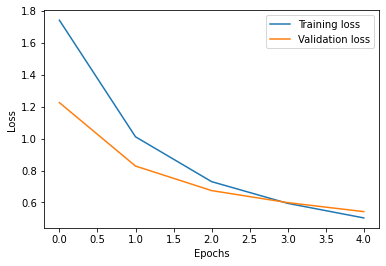

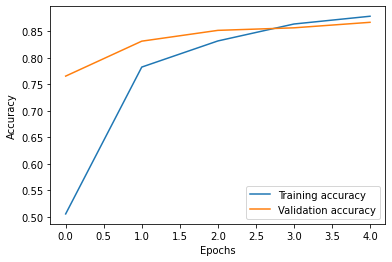

In [43]:
plot_loss_curve(hist2)

In [44]:
efficientnet_b7_url = "https://tfhub.dev/google/efficientnet/b7/classification/1"

In [45]:
efficientnet_b7_model = create_model(efficientnet_b7_url,
                            num_classes = train_data_10_percent.num_classes)

In [46]:
efficientnet_b7_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_extraction_layer (K  (None, 1000)             66658680  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                10010     
                                                                 
Total params: 66,668,690
Trainable params: 10,010
Non-trainable params: 66,658,680
_________________________________________________________________


In [48]:
efficientnet_b7_model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
hist3= efficientnet_b7_model.fit(train_data_10_percent, epochs =10, steps_per_epoch=len(train_data_10_percent),
                        validation_data= test_data_10_percent, validation_steps= len(test_data_10_percent),
                        callbacks =[create_tensorboard_callback(dir_name= 'tensorflow_hub', experiment_name='EfficientNetB7')])

Saving tensorboard log files to : tensorflow_hub/EfficientNetB720220412-070141
Epoch 1/10
24/24 [==============================] - 64s 2s/step - loss: 1.7050 - accuracy: 0.4253 - val_loss: 0.9143 - val_accuracy: 0.7084
Epoch 2/10
24/24 [==============================] - 36s 2s/step - loss: 0.7137 - accuracy: 0.7693 - val_loss: 0.6380 - val_accuracy: 0.7988
Epoch 3/10
24/24 [==============================] - 36s 2s/step - loss: 0.5154 - accuracy: 0.8453 - val_loss: 0.5766 - val_accuracy: 0.8112
Epoch 4/10
24/24 [==============================] - 35s 2s/step - loss: 0.4093 - accuracy: 0.8907 - val_loss: 0.5242 - val_accuracy: 0.8376
Epoch 5/10
24/24 [==============================] - 36s 2s/step - loss: 0.3396 - accuracy: 0.9120 - val_loss: 0.5122 - val_accuracy: 0.8348
Epoch 6/10
24/24 [==============================] - 36s 2s/step - loss: 0.2957 - accuracy: 0.9400 - val_loss: 0.5007 - val_accuracy: 0.8352
Epoch 7/10
24/24 [==============================] - 36s 2s/step - loss: 0.2536 - 

In [50]:
google_inception_url = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5"

In [51]:
google_inception_v3 = create_model(google_inception_url,
                            num_classes = train_data_10_percent.num_classes)

In [53]:
google_inception_v3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_extraction_layer (K  (None, 2048)             21802784  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 21,823,274
Trainable params: 20,490
Non-trainable params: 21,802,784
_________________________________________________________________


In [54]:
google_inception_v3.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
hist4= google_inception_v3.fit(train_data_10_percent, epochs =5, steps_per_epoch=len(train_data_10_percent),
                        validation_data= test_data_10_percent, validation_steps= len(test_data_10_percent),
                        callbacks =[create_tensorboard_callback(dir_name= 'tensorflow_hub', experiment_name='Google_Inception_V3')])

Saving tensorboard log files to : tensorflow_hub/Google_Inception_V320220412-071656
Epoch 1/5
24/24 [==============================] - 18s 769ms/step - loss: 1.7731 - accuracy: 0.4093 - val_loss: 1.0109 - val_accuracy: 0.6736
Epoch 2/5
24/24 [==============================] - 15s 664ms/step - loss: 0.9077 - accuracy: 0.7187 - val_loss: 0.8212 - val_accuracy: 0.7272
Epoch 3/5
24/24 [==============================] - 16s 666ms/step - loss: 0.7173 - accuracy: 0.7827 - val_loss: 0.7699 - val_accuracy: 0.7348
Epoch 4/5
24/24 [==============================] - 16s 695ms/step - loss: 0.6094 - accuracy: 0.8000 - val_loss: 0.7349 - val_accuracy: 0.7476
Epoch 5/5
24/24 [==============================] - 15s 664ms/step - loss: 0.4738 - accuracy: 0.8547 - val_loss: 0.6674 - val_accuracy: 0.7800


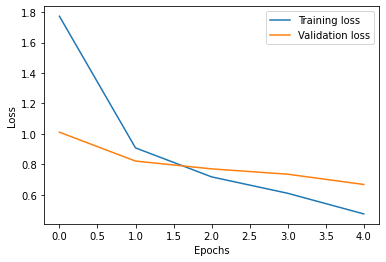

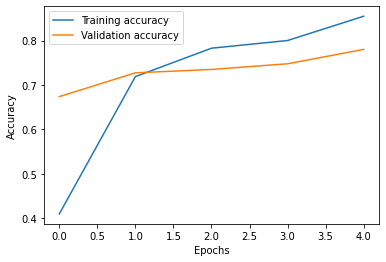

In [57]:
plot_loss_curve(hist4)

## Comparing our models results using TensorBoard

In [65]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2 vs ResNet50B7 vs Google_Inception_V3" \
  --description "Comparing different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=s2a3CZeLiGGwso8sNSFuAUNuilATmo&prompt=consent&access_type=off

Follow the link above to check out the graph

In [66]:
# Check experiments you have on Tensorboard

! tensorboard dev list

https://tensorboard.dev/experiment/tYoy6fYPT1ij88KZ0vuMIQ/
	Name                 EfficientNetB0 vs. ResNet50V2 vs ResNet50B7 vs Google_Inception_V3
	Description          Comparing different TF Hub feature extraction models architectures using 10% of training images
	Id                   tYoy6fYPT1ij88KZ0vuMIQ
	Created              2022-04-12 07:35:58 (4 minutes ago)
	Updated              2022-04-12 07:36:08 (4 minutes ago)
	Runs                 8
	Tags                 5
	Scalars              150
	Tensor bytes         0
	Binary object bytes  13579853
Total: 1 experiment(s)


In [ ]:
# Delete with this code

# ! tensorboard dev delete --experiment_id tYoy6fYPT1ij88KZ0vuMIQ